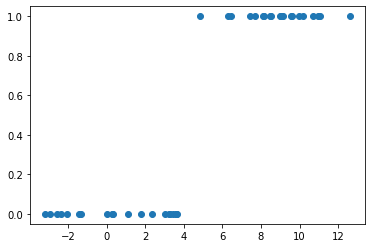

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

x=np.hstack((np.random.normal(2,3,20),np.random.normal(9,2,20)))
y=np.hstack((np.zeros(20), np.ones(20)))
a=np.random.normal(5,3,20)
plt.scatter(x,y)
plt.show()

In [ ]:
def regresion_logistica(x,a_0,a_1):
  return 1/(1+np.exp(-(a_0+a_1*x)))

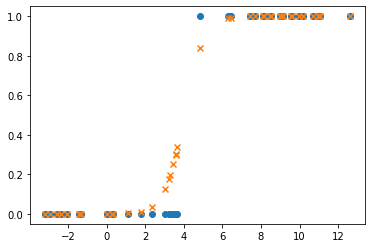

In [ ]:
pronostico=regresion_logistica(x,-8,2)

plt.scatter(x,y)
plt.scatter(x,pronostico,marker='x')
plt.show()

In [ ]:
from sklearn.datasets import load_iris as iris 
datos=iris()['data']
datos=pd.DataFrame(datos,columns=['sep_l','sep_a','pet_l','pet_a'])
datos['target']=iris()['target']
datos

,sep_l,sep_a,pet_l,pet_a,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
import statsmodels.api as sm
x=datos[['sep_l','sep_a','pet_l','pet_a']]
y=datos[['target']]

x=sm.add_constant(x)
glm_binom=sm.GLM(y,x,family=sm.families.Binomial() )


In [ ]:
from sklearn.model_selection import train_test_split as split 
#from sklearn.linear_model import LogisticRegression as LR
from sklearn.neural_network import MLPClassifier as LR
x=datos[['sep_l','sep_a','pet_l','pet_a']]
y=datos[['target']]

x_train,x_test,y_train,y_test=split(x,y,test_size=0.2)

alg=LR()
alg.fit(x_train,y_train)
print(alg.score(x,y))
datos['pronostico']=alg.predict(x)
datos.head()


0.9733333333333334


/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,sep_l,sep_a,pet_l,pet_a,target,pronostico,t1,t2
0,5.1,3.5,1.4,0.2,0,0,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,0,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,0,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,0,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,0,-2.728717,0.326755


In [ ]:
from sklearn.decomposition import PCA
x=datos[['sep_l','sep_a','pet_l','pet_a']]
alg2=PCA(n_components=2)
alg2.fit(x)
t=pd.DataFrame(alg2.transform(x),columns=['t1','t2'])
datos=pd.concat((datos,t),axis=1)
datos.head()

,sep_l,sep_a,pet_l,pet_a,target,pronostico,t1,t2,t1,t2
0,5.1,3.5,1.4,0.2,0,0,-2.684126,0.319397,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,0,-2.714142,-0.177001,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,0,-2.888991,-0.144949,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,0,-2.745343,-0.318299,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,0,-2.728717,0.326755,-2.728717,0.326755


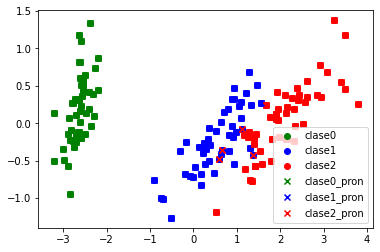

In [ ]:
g0=datos[datos['target']==0]
g1=datos[datos['target']==1]
g2=datos[datos['target']==2]

plt.scatter(g0['t1'],g0['t2'],label='clase0',color='g')
plt.scatter(g1['t1'],g1['t2'],label='clase1',color='b')
plt.scatter(g2['t1'],g2['t2'],label='clase2',color='r')

g0=datos[datos['pronostico']==0]
g1=datos[datos['pronostico']==1]
g2=datos[datos['pronostico']==2]

plt.scatter(g0['t1'],g0['t2'],label='clase0_pron',marker='x',color='g')
plt.scatter(g1['t1'],g1['t2'],label='clase1_pron',marker='x',color='b')
plt.scatter(g2['t1'],g2['t2'],label='clase2_pron',marker='x',color='r')
plt.legend()
plt.show()